## Introduction to Scitk - learn (SKLearn)
### Scikit Learn s a Python Machine learning Library. It is built on Numpy and Matplotlib
    This notebook demonstrates some of the most usefull function sof the beautiful Scikit Learn Library :

Contents :

0. An end to end Scikit Learn Workflow
1. Getting the data ready
2. Choose the right estimator / algorithm for our problems
3. Fit the model / algorithm and use it to make predictions on our data
4. Evaluate a model
5. Improve a model
6. Save and Load a trained model
7. Putting it all together


## 0. An End to End Scikit Learn WorkFlow

In [11]:
import numpy as np
# 1. Get the data ready
import numpy as np
import pandas as pd
from matplotlib.lines import lineStyles
from torch.fx import symbolic_trace
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

from God_Light.Data_Science.Machine_Learning.Health_Project.env.Lib.ctypes.macholib.dyld import dyld_override_search

#from transformers.pipelines import values
#from wheel.metadata import yield_lines

#from Health_Project.Inroduction_to_pandas import car_sales_missing , car_sales_missing_dropped

heartd = pd.read_csv('data/heart-disease.csv')
heartd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
# Creat X (Features Matrix)

x = heartd.drop('target', axis=1)

#Create y (lables)

y = heartd['target']

In [13]:
# 2. Choose the right model and hyperparameters
import pandas as np
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Keep the default hyperparameter
clf.get_params()

# 3.  Fit the model to training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [14]:
clf.fit(x_train, y_train);

In [15]:
# Make Prediction
y_label  = clf.predict(np.array([0,2,3,4]))
y_label

C:\Users\Guptm\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.arrays.integer.IntegerArray'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [16]:
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1])

In [17]:
# Evaluate the Model on the training data and the test data
clf.score(x_test, y_test)

0.8032786885245902

In [18]:
clf.score(x_train, y_train)

1.0

In [19]:
from sklearn.metrics import classification_report ,confusion_matrix,accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.78      0.91      0.84        34

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.79        61
weighted avg       0.81      0.80      0.80        61



In [20]:
confusion_matrix(y_test, y_preds)

array([[18,  9],
       [ 3, 31]])

In [21]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [22]:
 #. 5. Improve the model
 # Try different amoint of n_estimators
import numpy as np
 np.random.seed(42)
 for i in range (10,100,10):
     print(f"n_estimators = {i} estimators ....")
     clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
     print(f" Model Accuracy on test set : {clf.score(x_test, y_test)*100} ")
     print("")

n_estimators = 10 estimators ....
 Model Accuracy on test set : 75.40983606557377 

n_estimators = 20 estimators ....
 Model Accuracy on test set : 73.77049180327869 

n_estimators = 30 estimators ....
 Model Accuracy on test set : 80.32786885245902 

n_estimators = 40 estimators ....
 Model Accuracy on test set : 78.68852459016394 

n_estimators = 50 estimators ....
 Model Accuracy on test set : 78.68852459016394 

n_estimators = 60 estimators ....
 Model Accuracy on test set : 77.04918032786885 

n_estimators = 70 estimators ....
 Model Accuracy on test set : 80.32786885245902 

n_estimators = 80 estimators ....
 Model Accuracy on test set : 77.04918032786885 

n_estimators = 90 estimators ....
 Model Accuracy on test set : 78.68852459016394 



In [26]:
# 6. Save a model and load it
import pickle
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

In [27]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.predict(x_test,y_test)

TypeError: ForestClassifier.predict() takes 2 positional arguments but 3 were given

In [25]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.predict(x_test,y_test)

TypeError: ForestClassifier.predict() takes 2 positional arguments but 3 were given

In [28]:
# Load the trained model
loaded_model = pickle.load ( open ( 'random_forest_model_1.pkl' , 'rb' ) )

# Predict using only X_test
y_pred = loaded_model.predict ( x_test )

# If you want to evaluate accuracy
accuracy = accuracy_score ( y_test , y_pred )
print ( f"Model accuracy: {accuracy}" )

# Alternatively, you can use the `score` method directly:
accuracy = loaded_model.score ( x_test , y_test )
print ( f"Evaluated accuracy using score method: {accuracy}" )


Model accuracy: 0.7868852459016393
Evaluated accuracy using score method: 0.7868852459016393


In [29]:
content = [ "0. An end-to-end Scikit Learn Workflow",
            "1. Getting the data ready",
            "2. Choose the right estimator / algorithm for our problems",
            "3. Fit the model / algorithm and use it to make predictions on our data",
            "4. Evaluate a model",
            "5. Improve a model",
            "6. Save and Load a trained model",
            "7. Putting it all together", ]


In [30]:
content

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator / algorithm for our problems',
 '3. Fit the model / algorithm and use it to make predictions on our data',
 '4. Evaluate a model',
 '5. Improve a model',
 '6. Save and Load a trained model',
 '7. Putting it all together']

## Gettting Our Data ready to be used with Machine Learning

*Three main things we have to do:*
    1. Split the data inot features and labels (Usually X and y)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numureical values to numerical values (also called feature encoding)

In [31]:
heartd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [32]:
heartd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
x = heartd.drop("target",axis =1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [35]:
y = heartd["target"]
y.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
#Split the data into training and the test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape , x_test.shape , y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [37]:
x.shape

(303, 13)

In [38]:
len(heartd)

303

### Make sure date is Numerical

In [39]:
carse = pd.read_csv("data/car-sales-extended.csv")
carse

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [40]:
len(carse)

1000

In [30]:
carse.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [42]:
# Split data in to x and y

x = carse.drop("Price",axis=1)
y = carse["Price"]

# Split into training nad test
x_train, x_test , y_train,y_test = train_test_split(x,y,test_size=0.2)


In [43]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Nissan'

### Working with Missing Values

1. Fill the space with some values ( Also know as imputation )
2. Remove the samples awitht the missing values altogehter


In [44]:
carm = pd.read_csv("data/car-sales-missing-data.csv")
carm

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [45]:
carm.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [46]:
x = carm.drop("Price", axis = 1)
y = carm["Price"]

In [47]:
### Fill Missing data with Pandas
# Assume you already have the DataFrame carm
# Remove leading/trailing whitespaces from column names
carm.columns = carm.columns.str.strip ()

carm["Make"].fillna("Missing", inplace=True)

# Fill the color column
carm["Colour"].fillna("Missing", inplace=True)

# Fill the Odometer column
carm["Odometer "].fillna(carm["Odometer "].mean(), inplace=True)

# Fill the Doors column

carm["Doors"].fillna(carm["Doors"].mean(), inplace=True)


C:\Users\Guptm\AppData\Local\Temp\ipykernel_53172\2069776245.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carm["Make"].fillna("Missing", inplace=True)
C:\Users\Guptm\AppData\Local\Temp\ipykernel_53172\2069776245.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

KeyError: 'Odometer '

In [48]:
carm.isna().sum()

Make        0
Colour      0
Odometer    4
Doors       1
Price       2
dtype: int64

In [49]:
carm

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,Missing,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,Missing,White,31600.0,4.0,"$9,700"


In [50]:
# Remove rows with missing Price values

carm.dropna(inplace=True)
carm.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

In [51]:
carm.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
9,Missing,White,31600.0,4.0,"$9,700"


In [52]:
x = carm.drop('Price', axis =1)
y = carm['Price']

In [53]:
### Option 2 : Fill missing values using Sci Kit Learn.

### Option 2 : Fill missing values using Sci Kit Learn.

In [54]:
car_sales_missing= pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [55]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [56]:
car_sales_missing.head ()


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [57]:
#Drop the rows with no labels
car_sales_missing.dropna(subset = ['Price'], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
#Split into X and Y
x = car_sales_missing.drop('Price', axis =1)
y = car_sales_missing["Price"]

In [61]:
#Fill missing values with Scikeit Learn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Fill Categorical Values with missing wiht numerical values with "mean"

cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
doors_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
nun_imputer = SimpleImputer(strategy = "mean")

#Define Columns
cat_feature = ["Make", "Colour"]
doors_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer ( Something that fills the missing data)
imputer  = ColumnTransformer([("cat_imputer", cat_imputer, cat_feature),
                              ("doors_imputer", doors_imputer, doors_feature),
                              ("num_imputer", nun_imputer, num_feature)])

#Transform the data
filled_X = imputer.fit_transform(x)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [62]:
car_sales_filled = pd.DataFrame(filled_X, columns = [
    "Make", "Colour", "Odometer (KM)", "Doors"])
car_sales_filled.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [63]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
dtype: int64

In [65]:
# Convert data into numbers using Sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 913)>

In [66]:
# Now we've got our data as number and filled ( no missing
# Lets fit a  model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test,y_test)


-0.044955128011236356

In [67]:
len(car_sales_filled)

950

## 2. Choose the right estimator / algorithm for our problems
Some things to note :
* Sklearn refers to machine learning models , algorithms as estimators.
* Classification problem - predicting a category ( heart disease or not )
  - Sometimes you'll see cls(short for classifier used as classification estimator
* Regression problem - predicting a number ( selling price of a car )

If you are working on a machine learning algorithm and looking to use Sklearn whiles you are not sure :
Follow the Sklearn official documentation

## 2.1 Picking a machine learning model for a regression problem

Lets use the California Housing dataset.


In [68]:
# Get Califonia Housing Sataeste
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [69]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [70]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [72]:
housing_df = housing_df.drop("MedHouseVal", axis=1)


KeyError: "['MedHouseVal'] not found in axis"

In [73]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [75]:
#Import Algroithm

# Set up seed
np.random.seed(42)

# Create the data
x= housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in 100.0000

#SPlit into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model ( on the training set )
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
#model = RandomForestRegressor() # Using the Random Forest Model
model = Ridge()
model.fit(x_train,y_train)

# Check the scre of the test
model.score(x_test,y_test)



0.5758549611440126

## Using Ensemble Models.  Check Official SkLearn Website

In [76]:
# Trying with another model : Ensemble
#Import Algroithm
from sklearn.ensemble import RandomForestRegressor

# Set up seed
np.random.seed(42)

# Create the data
x= housing_df.drop("target", axis=1)
y = housing_df["target"] # median house price in 100.0000

#SPlit into test and train
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instantiate and fit the model ( on the training set )

model = RandomForestRegressor() # Using the Random Forest Model
model.fit(x_train,y_train)

# Check the scre of the test
model.score(x_test,y_test)


0.806652667101436

## Picking an estimator for a classification problem
### Using the map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html



In [77]:
# Using the heart disease dataset
heart_d = pd.read_csv("data/heart-disease.csv")
heart_d.head()
len(heart_d)

303

In [78]:
# Rewriting for Classification to use LinearSVC

# Import Linear SVC estimato
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_d.drop("target", axis=1)
y = heart_d["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate LinearSVC
clf = LinearSVC(max_iter = 10000)
clf.fit(x_train,y_train)

#Evaluate the LinearSVC
clf.score(x_test,y_test)


0.8688524590163934

In [79]:
heart_d["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [80]:
# Rewriting for RandomForestClassifier estimator class

# Import RandomForestClassifier estimator
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_d.drop("target", axis=1)
y = heart_d["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Instatiate Random Forest Calssifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Evaluate the RandomForestClassifier
clf.score(x_test,y_test)

 # If you have a structered data, use ensemble methods
 # If you have unstructured data , use deep learning or transfer learning ( Images, text, voice data, video data etc)


0.8524590163934426

## 3. Fit the model / algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data
Different names for :
* 'x' = features, feature variabe, datat
* 'y' = labels, targets, target variables

In [81]:
#Import the RandomForest Classifier Model
from sklearn.ensemble import RandomForestClassifier
# setup random seed
np.random.seed(42)

#make the data
x= heart_d.drop("target", axis=1)
y = heart_d["target"]

#Split the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate Random forest Classifier
clf = RandomForestClassifier(n_estimators=100)

#Fit the model to the data - training machine learning model
clf.fit(x_train,y_train)

#Evaluate the Random Forest Classifier - Use Patterns that the model has learnt form training
clf.score(x_test,y_test)

0.8524590163934426

In [82]:
x.head()6

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [72]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### Random Forest model deep Dive
The below are resource that can help to reduce the complexity of understanding the Random Forest Model usedd in machine learning
  * Random Forest in Python by yHat
  * An implementation and Explanation of the Random Forest in Python by Will Koehrsen

### 3.2 Make predictions using a machine learning model

2 Ways to make Predictions :
 1. 'Predict()'
 2. 'Predict_proba()'





In [73]:
## Use a trained model to make predictions
clf.predict(np.array([0,2,3,4])) # this doenst work

C:\Users\Guptm\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [74]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [75]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [76]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [77]:
# Compare predictiosn to truth lables to evalutae the models
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)


np.float64(0.8524590163934426)

In [78]:
clf.score(x_test,y_test)

0.8524590163934426

In [79]:
# Accuracy classification score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

##  Make Predictions of predict_proba()


In [80]:
#predict_proba()  returs probalities of a classification label
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [81]:
#Lets predict on the same data

clf.predict(x_test[:5])

array([0, 1, 1, 0, 1])

In [82]:
heart_d['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [83]:
## 'Predict ' can also be used for regression model

In [83]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
#Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#SPliting into training and tests
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Create model instance
model = RandomForestRegressor()

#fit the model to the data

model.fit(x_train,y_train)

# Make predictions
y_preds = model.predict(x_test)


In [84]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [85]:
np.array(y_test)[:10]

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [86]:
len(y_preds) # checking


4128

In [87]:
len(y_test)

4128

In [88]:
# Compare the preiction to the truth - On average this is o.3 different from the test value
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32656738464147306

In [89]:
housing_df['target']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

In [90]:
content

['0. An end-to-end Scikit Learn Workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator / algorithm for our problems',
 '3. Fit the model / algorithm and use it to make predictions on our data',
 '4. Evaluate a model',
 '5. Improve a model',
 '6. Save and Load a trained model',
 '7. Putting it all together']

## 4. Evaluating a machine learning model
Three ways to evaluate Scikt-Learn models / estimators
  *   1. Estimators - in builr score method
   *   2. The Scoring parameter
   *  3. Problem-Specific - Metric Functions
 Learn more here : https://scikit-learn.org/stable/modules/model_evaluation

### 4.1 Evaluating a model with the score method



In [83]:
from sklearn.ensemble import RandomForestClassifier
# Using the Heart disease data

#Setup randowm seed
np.random.seed(42)

#Create X and Y
x = heart_d.drop("target", axis=1)
y = heart_d["target"]

#Split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#instation model
model = RandomForestClassifier()

#Fit the model to data
model.fit(x_train,y_train)


RandomForestClassifier()

In [84]:
# The highest value for the .score method is 1.0 , the lowest is 0.0
clf.score(x_train,y_train)

1.0

In [85]:
clf.score(x_test,y_test)

0.8524590163934426

In [86]:
#Using the score method on a regression problem

from sklearn.ensemble import RandomForestRegressor
# Using the heartd_ data

#Setup Seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#SPlit data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
model = RandomForestRegressor(n_estimators=100)

#Fit model to data
model.fit(x_train,y_train)



RandomForestRegressor()

In [87]:
model.score(x_train,y_train)

0.9736861165621588

In [88]:
# The defualt score evalution metric is r_squared for regression algorithm ( Higest 1, lowest 0)
model.score(x_test,y_test)

0.806652667101436

In [89]:
model.score(x_test,y_test)

0.806652667101436

In [90]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 4.2 Evaluating a model using the scoring parameter


In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#Create Setup seed
np.random.seed(42)

#create data
x = heart_d.drop("target", axis=1)
y = heart_d["target"]

#Split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instatiate model
model = RandomForestClassifier(n_estimators = 100)

#fit model
model.fit(x_train,y_train)

RandomForestClassifier()

In [92]:
clf.score(x_test,y_test)

0.8524590163934426

In [93]:
cross_val_score(model, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.7       , 0.83333333, 0.73333333, 0.8       ])

In [94]:
np.random.seed(42)

#Single trainig  and test split score
model_single_score = model.score(x_test,y_test)

#Take the mean of 5-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, x, y, cv=5))
#Compare the two
model_single_score, model_cross_val_score

(0.8524590163934426, np.float64(0.8248087431693989))

In [95]:
# Defualt scoring parament of classifier =  mean accuracy
model.score()


TypeError: ClassifierMixin.score() missing 2 required positional arguments: 'X' and 'y'

In [96]:
#Scoring parameter of Classifier set to None by default
cross_val_score(model, x, y, cv=10, scoring=None)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
*3. Confusion matrix
*4. Classification report


In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


#build seed
np.random.seed(42)

#cReate data
X = heart_d.drop("target", axis=1)
y = heart_d["target"]
#Instantiate model
clf = RandomForestClassifier(n_estimators=100)

In [98]:
cross_val_score = cross_val_score( clf, X, y, cv=5 )
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [99]:
print(f' Heart disease Classifier Accuracy :{np.mean(cross_val_score) * 100:.2f}%')


 Heart disease Classifier Accuracy :82.48%


In [100]:
heart_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Area under curve ( AUC )* Area under th receiver operating characteristics curve ( AUC / RoC )

In [101]:
# Area under curve
# ROC curve
# ROC curves are a comparation of a models true positive rate tpr vrs a models false posiive rate fpr
# Thus 1. True Positive = model predicts 1 whne truth is 1
#      2. False positive = model predicts 1 when truth is 0
#      3. True negative  = model proedicts 0  when truth is 0
#      4.  Fakse negative = model predicts 0 when truth is 1


#Split data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.metrics import roc_curve

#fit data
clf.fit(x_train,y_train)

#Make prdeict
y_pred = clf.predict_proba(x_test)

y_pred[:10], len(y_pred)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [103]:
y_pred_prob = y_pred[:,1]
y_pred_prob[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [104]:
#Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Check the fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

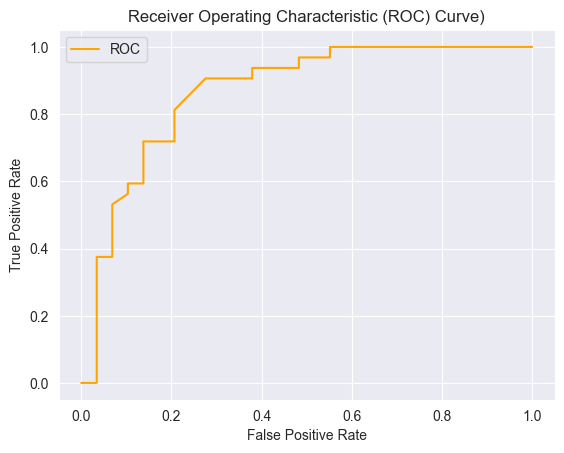

In [105]:
#Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """Ploting a ROC curve given tghe false positive rate and the true positive rate of the a model  """

    plt.plot(fpr, tpr, color = "orange", label="ROC")
   # plt.plot([0, 1], [0, 1], color = "blue",linestyle = "--", label ="Guessing" ) # highlighted for AUC Score

    #Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("Receiver Operating Characteristic (ROC) Curve)")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)

In [106]:
from sklearn.metrics import roc_auc_score
roc_auc_score (y_test, y_pred_prob)

np.float64(0.8669181034482759)

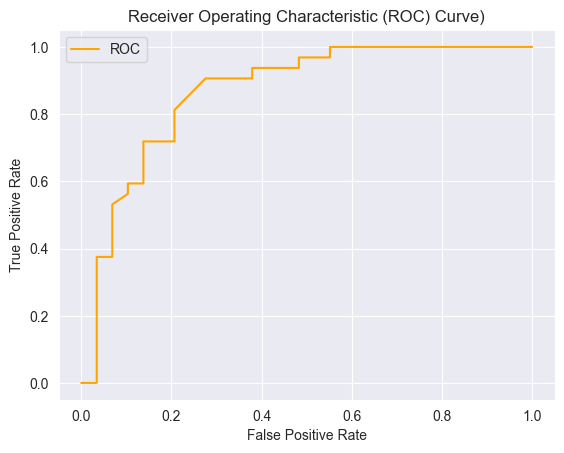

In [108]:
#PLot perdect ROC curve and AUC score

fpr,tpr, thresholds = roc_curve(y_test,y_pred_prob)
plot_roc_curve(fpr,tpr)

In [116]:
#Perfect AUC Score
roc_auc_score(y_test,y_test)

np.float64(1.0)

## Confusiion Matrix is a quick way to compare the lables a modle predicts it was suppposed to predict. In essnence , giving you an idea of where the model is getting confused.



In [109]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(x_test)

confusion_matrix(y_test,y_pred)


array([[23,  6],
       [ 6, 26]])

In [110]:
# Visual Confusion Metrics with pd.crostabs

pd.crosstab(y_test,y_pred, rownames=["Actual"], colnames=["Predicted"])


Predicted,0,1
Actual,,
0,23,6
1,6,26


<Axes: >

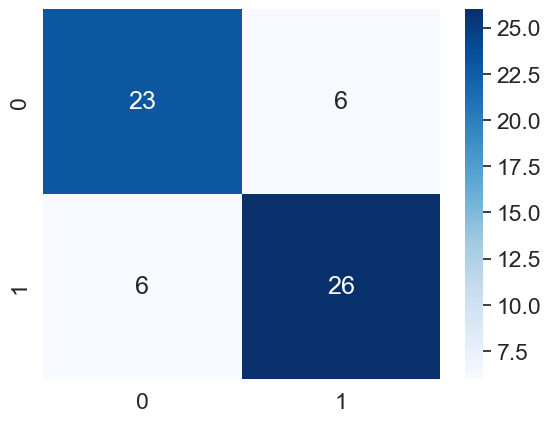

In [111]:
import seaborn as sns

#set the font scale
sns.set(font_scale = 1.5)

#Create a confusion matrix
conf_matr = confusion_matrix(y_test,y_pred)

#Plot it using Seaborn
sns.heatmap(conf_matr, annot=True, fmt="d", cmap="Blues")

# You can use this command to install a conda package from a Jupyter notebook into the current env.
# !Conda install --yes  --prefix {sys.prefix} seaborn.


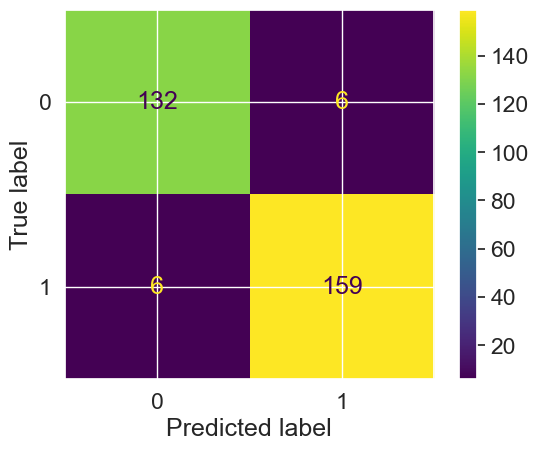

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf,X=x,y=y)


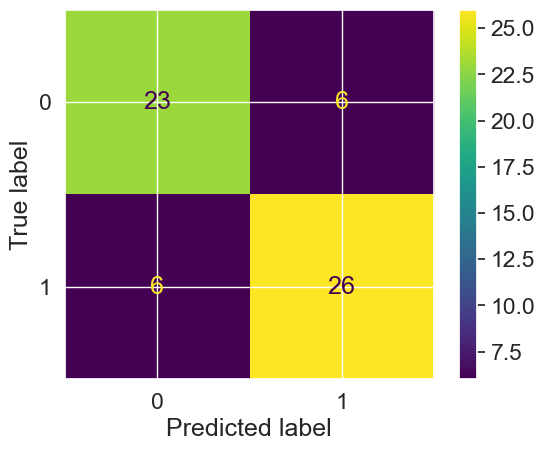

In [121]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred)

### Classification Report

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [123]:
# Where precison and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))


C:\Users\Guptm\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Guptm\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Guptm\anaconda3\envs\Machine_Learning\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### To summarize classificationmetrics :
   * Accuracy is a good measure to start with if all classes are balanced.
   * Precision and recall become more important when classes are imblanced
   * If flase positives prediction are worse than false negatives , aim for higher position.
   * If false negative pprediction are worse than false positives , aim for higher positions.
   * F1 - Score is a combination of precison and recall.


### 4.2.2 Regression model evaluation metrics :
Model evaluation metrics documentation  - scikit-learn - regression metrics
We will be covering  the below :
* R Squared
* Mmean absolute error
* Mean Square Error

In [125]:
from sklearn.ensemble import RandomForestRegressor

#Make seed.
np.random.seed(42)

#Creating data

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

#Split data for training
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
model = RandomForestRegressor(n_estimators=100)

#Fit model
model.fit(x_train,y_train)

RandomForestRegressor()

In [126]:
model.score(x_test,y_test)

0.806652667101436

In [127]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [128]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [129]:
y_test.mean()

np.float64(2.0550030959302323)

In [130]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [131]:
y_test_mean[:10]


array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [134]:
r2_score(y_true = y_test, y_pred = y_test_mean)

0.0

In [136]:
r2_score(y_true = y_test, y_pred = y_test)

1.0

##### Mean Absolute Error
MAE is the average of the absolute difference between predictions and actual values.
It gives you an idea of how wrong your predictions are.


In [137]:
# MAE
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mae

0.32656738464147306

In [138]:
y_pred

array([0.4939   , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67781  ])

In [139]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [140]:
df = pd.DataFrame(data = {"actual values " : y_test, "predicted values" : y_pred})
df["difference"] = df["actual values "] - df["predicted values"]
df.head(10)

,actual values,predicted values,difference
20046,0.47700,0.493900,-0.016900
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540240,-0.354240
9814,2.78000,2.331760,0.448240
13311,1.58700,1.660220,-0.073220
7113,1.98200,2.343100,-0.361100
7668,1.57500,1.663110,-0.088110
18246,3.40000,2.474890,0.925110
5723,4.46600,4.834478,-0.368478


In [141]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [142]:
df["difference"].mean()

np.float64(-0.0120639253875965)

In [143]:
np.abs(df["difference"]).mean()  # Using fornula

np.float64(0.32656738464147306)

#### Mean Squared Error ( MSE)
MSE is the mean of the square of the errors between actual and the predicted values.

In [163]:
#MMean Squared Error
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred )
mse

0.25336408094921037

In [164]:
df["Squared_difference" ] = np.square(df["difference"])

In [165]:
df.head()

,actual values,predicted values,difference,Squared_difference
20046,0.47700,0.493900,-0.016900,0.000286
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540240,-0.354240,0.125486
9814,2.78000,2.331760,0.448240,0.200919


In [147]:
#Calculateing using formulae
squared = np.square(df["difference"])
squared.mean()

np.float64(0.25336408094921037)

In [148]:
df.head()

,actual values,predicted values,difference,Squared_difference
20046,0.47700,0.493900,-0.016900,0.000286
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540240,-0.354240,0.125486
9814,2.78000,2.331760,0.448240,0.200919


In [166]:
df_large_error = df.copy()

In [167]:
df_large_error.iloc[0]["Squared_difference"] = 16
df.head()

C:\Users\Guptm\AppData\Local\Temp\ipykernel_49608\192644323.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["Squared_difference"] = 16


,actual values,predicted values,difference,Squared_difference
20046,0.47700,0.493900,-0.016900,0.000286
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540240,-0.354240,0.125486
9814,2.78000,2.331760,0.448240,0.200919


In [173]:
first_index = df.index[0] # Replacing error with our own figure
df_large_error = df.copy ()
df_large_error.loc[first_index , "Squared_difference"] = 16
df_large_error.head ()

,actual values,predicted values,difference,Squared_difference
20046,0.47700,0.493900,-0.016900,16.000000
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540240,-0.354240,0.125486
9814,2.78000,2.331760,0.448240,0.200919


In [174]:
# Calculate MSE with Large Error

df_large_error["Squared_difference"].mean()

np.float64(0.2610978002791307)

In [176]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,difference,Squared_difference
20046,0.47700,0.493900,-0.016900,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.219830,0.413170,0.170709
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [177]:
# Calculate the MSE with the large Errors
df_large_error["Squared_difference" ] .mean()

np.float64(0.7371681174847352)

### 4.2.3 Using the Scoring Parameter


In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_d.drop("target", axis=1)
y = heart_d["target"]

clf = RandomForestClassifier(n_estimators=100)

In [180]:
np.random.seed(42)

#Cross-Validation accuracy
cv_acc = cross_val_score(clf, x, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [181]:
#Cross validated Accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%')


The cross-validated accuracy is: 82.48%


In [182]:
np.random.seed(42)

cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [183]:
#Cross validated Accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%')


The cross-validated accuracy is: 82.48%


In [184]:
#Precision
np.random.seed(42)
cv_precisions = cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precisions

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [185]:
#Cross validated Accuracy
print(f'The cross-validated precision is: {np.mean(cv_precisions) }')


The cross-validated accuracy is: 0.8329547346025924


In [186]:
#REcall
np.random.seed(42)
cv_recalls = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recalls

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [187]:
#Cross validated Recall
print(f'The cross-validated precision is: {np.mean(cv_recalls) }')

The cross-validated precision is: 0.8545454545454545


In [189]:
#Using the Scoring problem for a Regression Problem

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]
model = RandomForestRegressor(n_estimators=100)


In [190]:
np.random.seed(42)
cv_r2 = cross_val_score(model, x, y, cv=3, scoring="r2")
np.mean(cv_r2)

np.float64(0.6545660727379677)

In [191]:
cv_r2

array([0.62156808, 0.72076221, 0.62136792])

In [194]:
#Mean Absolute error
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)


np.float64(-0.4634676564970931)

In [195]:
#Mean Squared Error
cv_mse = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

np.float64(-0.4307598833366243)

In [7]:
cv_mae

NameError: name 'cv_mae' is not defined

In [197]:
cv_mse

array([-0.52212855, -0.34450695, -0.37230252, -0.44813564, -0.46672576])

 4.3 Using different different  evaluation metrics as Scikit-Learn functions
** The 3rd way way to evaluate scikit learn machine learning models /estimators is to using the skilearn metrics module

In [10]:
# Starting with Classification Problems

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

#Create X and Y
x = heart_d.drop("target", axis=1)
y = heart_d["target"]

#SPlit data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#Create model
clf = RandomForestClassifier(n_estimators=100)

#fit Model
clf.fit(x_train,y_train)

#Make Prediction
y_pred = clf.predict(x_test)

# Evaluate model using evaluation functions
accuracy_score(y_test,clf.predict(x_test))
print (f'Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%')
print (f'precision_score: {precision_score(y_test,y_pred)}')
print (f'Recall_Score: {recall_score(y_test,y_pred)}')
print (f'F1_Score: {f1_score(y_test,y_pred)}')


AttributeError: module 'pandas' has no attribute 'random'

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Create Data


#Split data

#Create Model

#Fit Model

#Evaluate model using evaluation Function
